# Cohere Pets - LLM Chatbot Evaluation Framework
## Phase 5: LLM Evaluation Design

**Context**: Cohere Pets has developed a chatbot using LLMs to extract and summarize unstructured clinical notes from veterinarians. The chatbot aims to help human reviewers make faster, more informed decisions about prior authorizations that are not auto-approved.

**Challenge**: We need to evaluate whether the chatbot produces valid and reliable output.

**Note**: This notebook contains the evaluation design and framework. We are not building the actual evaluation system, but rather designing the approach.

## 1. Evaluation Dimensions

We will evaluate the LLM chatbot across **5 key dimensions**:

In [6]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define evaluation dimensions
evaluation_dimensions = {
    'Accuracy': {
        'description': 'Correctness of extracted information vs ground truth',
        'importance': 'Critical',
        'measurement': 'Comparison against expert-validated gold standard'
    },
    'Completeness': {
        'description': 'Coverage of all relevant clinical facts from notes',
        'importance': 'High',
        'measurement': 'Recall of required clinical elements'
    },
    'Consistency': {
        'description': 'Test-retest reliability with same input',
        'importance': 'High',
        'measurement': 'Variance across multiple runs with identical input'
    },
    'Hallucination': {
        'description': 'Detection of fabricated or unsupported information',
        'importance': 'Critical',
        'measurement': 'Fact verification against source notes'
    },
    'Usefulness': {
        'description': 'Practical value to human reviewers',
        'importance': 'High',
        'measurement': 'Time savings, decision quality, user satisfaction'
    }
}

# Display as table
eval_df = pd.DataFrame(evaluation_dimensions).T.reset_index()
eval_df.columns = ['Dimension', 'Description', 'Importance', 'Measurement Method']
eval_df

,Dimension,Description,Importance,Measurement Method
0,Accuracy,Correctness of extracted information vs ground...,Critical,Comparison against expert-validated gold standard
1,Completeness,Coverage of all relevant clinical facts from n...,High,Recall of required clinical elements
2,Consistency,Test-retest reliability with same input,High,Variance across multiple runs with identical i...
3,Hallucination,Detection of fabricated or unsupported informa...,Critical,Fact verification against source notes
4,Usefulness,Practical value to human reviewers,High,"Time savings, decision quality, user satisfaction"


## 2. Detailed Evaluation Methods

### 2.1 Accuracy Evaluation

In [7]:
accuracy_evaluation = {
    'Method': 'Gold Standard Comparison',
    
    'Approach': [
        '1. Create gold-standard dataset:',
        '   - Select 200 diverse clinical notes (stratified by complexity, procedure type)',
        '   - Have 2-3 expert veterinary reviewers manually extract key information',
        '   - Resolve disagreements through consensus',
        '   - Document ground truth facts for each note',
        '',
        '2. Run LLM chatbot on same notes',
        '',
        '3. Compare LLM output to gold standard using:',
        '   - Exact match accuracy for structured fields (diagnosis, procedure)',
        '   - Semantic similarity scores (ROUGE, BLEU) for summaries',
        '   - F1 score for information extraction tasks',
        '   - Expert rating (1-5 scale) on overall accuracy'
    ],
    
    'Metrics': [
        'Precision: % of LLM-extracted facts that are correct',
        'Recall: % of gold-standard facts captured by LLM',
        'F1 Score: Harmonic mean of precision and recall',
        'ROUGE-L: Longest common subsequence overlap',
        'Semantic similarity: Embedding-based cosine similarity'
    ],
    
    'Success_Criteria': [
        'Precision >= 95% (minimize false information)',
        'Recall >= 85% (capture most relevant facts)',
        'Expert rating >= 4.0/5.0'
    ]
}

print("ACCURACY EVALUATION DESIGN")
print("="*80)
print(f"Method: {accuracy_evaluation['Method']}")
print(f"\nApproach:")
for step in accuracy_evaluation['Approach']:
    print(f"  {step}")
print(f"\nMetrics:")
for metric in accuracy_evaluation['Metrics']:
    print(f"  • {metric}")
print(f"\nSuccess Criteria:")
for criterion in accuracy_evaluation['Success_Criteria']:
    print(f"  ✓ {criterion}")

ACCURACY EVALUATION DESIGN
Method: Gold Standard Comparison

Approach:
  1. Create gold-standard dataset:
     - Select 200 diverse clinical notes (stratified by complexity, procedure type)
     - Have 2-3 expert veterinary reviewers manually extract key information
     - Resolve disagreements through consensus
     - Document ground truth facts for each note
  
  2. Run LLM chatbot on same notes
  
  3. Compare LLM output to gold standard using:
     - Exact match accuracy for structured fields (diagnosis, procedure)
     - Semantic similarity scores (ROUGE, BLEU) for summaries
     - F1 score for information extraction tasks
     - Expert rating (1-5 scale) on overall accuracy

Metrics:
  • Precision: % of LLM-extracted facts that are correct
  • Recall: % of gold-standard facts captured by LLM
  • F1 Score: Harmonic mean of precision and recall
  • ROUGE-L: Longest common subsequence overlap
  • Semantic similarity: Embedding-based cosine similarity

Success Criteria:
  ✓ Precision

### 2.2 Completeness Evaluation

In [8]:
completeness_evaluation = {
    'Method': 'Clinical Element Checklist',
    
    'Required_Elements': [
        'Patient Information: Pet ID, name, species, breed, age',
        'Chief Complaint: Primary reason for visit',
        'Diagnosis: Confirmed or suspected conditions',
        'Procedure Requested: Type and urgency',
        'Clinical Justification: Why procedure is medically necessary',
        'Prior Treatments: Previous interventions attempted',
        'Test Results: Relevant lab work, imaging, vitals',
        'Risk Factors: Contraindications, allergies, comorbidities'
    ],
    
    'Approach': [
        '1. Define comprehensive checklist of required clinical elements',
        '2. For each clinical note, manually mark which elements are present',
        '3. Run LLM chatbot and extract identified elements',
        '4. Calculate recall for each element type',
        '5. Identify patterns in missing information'
    ],
    
    'Metrics': [
        'Element-level recall: % of present elements correctly identified',
        'Note-level completeness: % of notes with all elements captured',
        'Critical miss rate: % of high-priority elements missed',
        'Average completeness score: Mean % of elements captured per note'
    ],
    
    'Success_Criteria': [
        'Critical element recall >= 98% (diagnosis, procedure, justification)',
        'Overall element recall >= 90%',
        'Note-level completeness >= 85%'
    ]
}

print("COMPLETENESS EVALUATION DESIGN")
print("="*80)
print(f"Method: {completeness_evaluation['Method']}")
print(f"\nRequired Clinical Elements:")
for i, element in enumerate(completeness_evaluation['Required_Elements'], 1):
    print(f"  {i}. {element}")
print(f"\nApproach:")
for step in completeness_evaluation['Approach']:
    print(f"  {step}")
print(f"\nMetrics:")
for metric in completeness_evaluation['Metrics']:
    print(f"  • {metric}")
print(f"\nSuccess Criteria:")
for criterion in completeness_evaluation['Success_Criteria']:
    print(f"  ✓ {criterion}")

COMPLETENESS EVALUATION DESIGN
Method: Clinical Element Checklist

Required Clinical Elements:
  1. Patient Information: Pet ID, name, species, breed, age
  2. Chief Complaint: Primary reason for visit
  3. Diagnosis: Confirmed or suspected conditions
  4. Procedure Requested: Type and urgency
  5. Clinical Justification: Why procedure is medically necessary
  6. Prior Treatments: Previous interventions attempted
  7. Test Results: Relevant lab work, imaging, vitals
  8. Risk Factors: Contraindications, allergies, comorbidities

Approach:
  1. Define comprehensive checklist of required clinical elements
  2. For each clinical note, manually mark which elements are present
  3. Run LLM chatbot and extract identified elements
  4. Calculate recall for each element type
  5. Identify patterns in missing information

Metrics:
  • Element-level recall: % of present elements correctly identified
  • Note-level completeness: % of notes with all elements captured
  • Critical miss rate: % of h

### 2.3 Consistency Evaluation

In [9]:
consistency_evaluation = {
    'Method': 'Test-Retest Reliability Analysis',
    
    'Approach': [
        '1. Select 100 clinical notes',
        '2. Run LLM chatbot on each note 5 times (with temperature=0 for determinism)',
        '3. Also test with temperature>0 to measure variability in production setting',
        '4. Compare outputs across runs for same input',
        '5. Calculate inter-run agreement metrics'
    ],
    
    'Metrics': [
        'Exact match rate: % of runs producing identical output',
        'Semantic similarity: Average cosine similarity across runs',
        'Fact consistency: % of extracted facts appearing in all runs',
        "Cohen's Kappa: Inter-rater agreement for categorical outputs",
        'Coefficient of variation: Variability in summary length, key metrics'
    ],
    
    'Temperature_Analysis': [
        'Temperature = 0: Should be 100% deterministic (baseline)',
        'Temperature = 0.3: Slight variation acceptable',
        'Temperature = 0.7: Moderate variation expected',
        'Recommendation: Use temperature <= 0.3 for production'
    ],
    
    'Success_Criteria': [
        'At temperature=0: 100% exact match (fully deterministic)',
        'At temperature=0.3: >= 80% fact consistency across runs',
        'Semantic similarity >= 0.95 for production temperature setting'
    ]
}

print("CONSISTENCY EVALUATION DESIGN")
print("="*80)
print(f"Method: {consistency_evaluation['Method']}")
print(f"\nApproach:")
for step in consistency_evaluation['Approach']:
    print(f"  {step}")
print(f"\nMetrics:")
for metric in consistency_evaluation['Metrics']:
    print(f"  • {metric}")
print(f"\nTemperature Analysis Strategy:")
for item in consistency_evaluation['Temperature_Analysis']:
    print(f"  • {item}")
print(f"\nSuccess Criteria:")
for criterion in consistency_evaluation['Success_Criteria']:
    print(f"  ✓ {criterion}")

CONSISTENCY EVALUATION DESIGN
Method: Test-Retest Reliability Analysis

Approach:
  1. Select 100 clinical notes
  2. Run LLM chatbot on each note 5 times (with temperature=0 for determinism)
  3. Also test with temperature>0 to measure variability in production setting
  4. Compare outputs across runs for same input
  5. Calculate inter-run agreement metrics

Metrics:
  • Exact match rate: % of runs producing identical output
  • Semantic similarity: Average cosine similarity across runs
  • Fact consistency: % of extracted facts appearing in all runs
  • Cohen's Kappa: Inter-rater agreement for categorical outputs
  • Coefficient of variation: Variability in summary length, key metrics

Temperature Analysis Strategy:
  • Temperature = 0: Should be 100% deterministic (baseline)
  • Temperature = 0.3: Slight variation acceptable
  • Temperature = 0.7: Moderate variation expected
  • Recommendation: Use temperature <= 0.3 for production

Success Criteria:
  ✓ At temperature=0: 100% exac

### 2.4 Hallucination Detection

In [10]:
hallucination_evaluation = {
    'Method': 'Source-Based Fact Verification',
    
    'Approach': [

'1. Extract all factual claims from LLM output (diagnosis, procedures, test results,
 dates)',
        '2. For each claim, verify presence in source clinical notes',
        '3. Use both automated and manual verification:',
        '   - Automated: String matching, semantic search in source',
        '   - Manual: Expert review of claims not found by automation',
        '4. Classify each claim as:',
        '   - Supported: Directly stated in source',
        '   - Inferred: Reasonable inference from source',
        '   - Hallucinated: Not supported by source',
        '5. Calculate hallucination rate'
    ],
    
    'High_Risk_Hallucinations': [
        'Medical diagnoses not mentioned in notes',
        'Fabricated test results or vital signs',
        'Incorrect medication names or dosages',
        'False contraindications or allergies',
        'Invented prior treatment history'
    ],
    
    'Metrics': [
        'Hallucination rate: % of claims not supported by source',
        'Critical hallucination rate: % of high-risk hallucinations',
        'Precision of fact extraction: % of claims that are verifiable',
        'Attribution accuracy: % of claims with correct source reference'
    ],
    
    'Success_Criteria': [
        'Overall hallucination rate <= 2%',
        'Critical hallucination rate = 0% (zero tolerance)',
        'All medical facts must be directly supported by source notes'
    ]
}

print("HALLUCINATION DETECTION DESIGN")
print("="*80)
print(f"Method: {hallucination_evaluation['Method']}")
print(f"\nApproach:")
for step in hallucination_evaluation['Approach']:
    print(f"  {step}")
print(f"\nHigh-Risk Hallucination Types (Zero Tolerance):")
for risk_type in hallucination_evaluation['High_Risk_Hallucinations']:
    print(f"  ⚠️  {risk_type}")
print(f"\nMetrics:")
for metric in hallucination_evaluation['Metrics']:
    print(f"  • {metric}")
print(f"\nSuccess Criteria:")
for criterion in hallucination_evaluation['Success_Criteria']:
    print(f"  ✓ {criterion}")

HALLUCINATION DETECTION DESIGN
Method: Source-Based Fact Verification

Approach:
  1. Extract all factual claims from LLM output (diagnosis, procedures, test results, dates)
  2. For each claim, verify presence in source clinical notes
  3. Use both automated and manual verification:
     - Automated: String matching, semantic search in source
     - Manual: Expert review of claims not found by automation
  4. Classify each claim as:
     - Supported: Directly stated in source
     - Inferred: Reasonable inference from source
     - Hallucinated: Not supported by source
  5. Calculate hallucination rate

High-Risk Hallucination Types (Zero Tolerance):
  ⚠️  Medical diagnoses not mentioned in notes
  ⚠️  Fabricated test results or vital signs
  ⚠️  Incorrect medication names or dosages
  ⚠️  False contraindications or allergies
  ⚠️  Invented prior treatment history

Metrics:
  • Hallucination rate: % of claims not supported by source
  • Critical hallucination rate: % of high-risk hall

### 2.5 Usefulness Evaluation

In [11]:
usefulness_evaluation = {
    'Method': 'User-Centered A/B Testing',
    
    'Approach': [
        '1. A/B Test Design:',
        '   - Control Group: Reviewers read raw clinical notes (current process)',
        '   - Treatment Group: Reviewers use LLM chatbot summaries',
        '   - Random assignment of 10-15 reviewers to each group',
        '   - Each group reviews same 50 authorization cases',
        '',
        '2. Measure:',
        '   - Time to decision (start to final approval/denial)',
        '   - Decision accuracy (vs gold standard decisions)',
        '   - Reviewer confidence scores (1-5 scale)',
        '   - Number of times reviewer re-reads source notes',
        '',
        '3. User Satisfaction Survey:',
        '   - Ease of use (1-5)',
        '   - Trust in summaries (1-5)',
        '   - Perceived time savings (1-5)',
        '   - Likelihood to recommend (NPS)',
        '   - Open-ended feedback'
    ],
    
    'Metrics': [
        'Time to Decision: Average minutes per authorization',
        'Time Savings: % reduction vs control group',
        'Decision Accuracy: % agreement with gold standard',
        'Decision Quality: Inter-rater reliability (Cohen Kappa)',
        'User Satisfaction: Mean rating across dimensions',
        'Net Promoter Score: Likelihood to recommend',
        'Adoption Rate: % of reviewers preferring LLM tool after trial'
    ],
    
    'Success_Criteria': [
        'Time to decision: >= 30% reduction vs control',
        'Decision accuracy: No degradation (>= 95% match to control)',
        'User satisfaction: >= 4.0/5.0 average',
        'Net Promoter Score: >= 50',
        'Adoption intent: >= 80% prefer LLM tool'
    ]
}

print("USEFULNESS EVALUATION DESIGN")
print("="*80)
print(f"Method: {usefulness_evaluation['Method']}")
print(f"\nApproach:")
for step in usefulness_evaluation['Approach']:
    print(f"  {step}")
print(f"\nMetrics:")
for metric in usefulness_evaluation['Metrics']:
    print(f"  • {metric}")
print(f"\nSuccess Criteria:")
for criterion in usefulness_evaluation['Success_Criteria']:
    print(f"  ✓ {criterion}")

USEFULNESS EVALUATION DESIGN
Method: User-Centered A/B Testing

Approach:
  1. A/B Test Design:
     - Control Group: Reviewers read raw clinical notes (current process)
     - Treatment Group: Reviewers use LLM chatbot summaries
     - Random assignment of 10-15 reviewers to each group
     - Each group reviews same 50 authorization cases
  
  2. Measure:
     - Time to decision (start to final approval/denial)
     - Decision accuracy (vs gold standard decisions)
     - Reviewer confidence scores (1-5 scale)
     - Number of times reviewer re-reads source notes
  
  3. User Satisfaction Survey:
     - Ease of use (1-5)
     - Trust in summaries (1-5)
     - Perceived time savings (1-5)
     - Likelihood to recommend (NPS)
     - Open-ended feedback

Metrics:
  • Time to Decision: Average minutes per authorization
  • Time Savings: % reduction vs control group
  • Decision Accuracy: % agreement with gold standard
  • Decision Quality: Inter-rater reliability (Cohen Kappa)
  • User Sat

## 3. Evaluation Dataset Design

In [12]:
dataset_design = {
    'Sample_Size': {
        'Accuracy': 200,
        'Completeness': 200,
        'Consistency': 100,
        'Hallucination': 200,
        'Usefulness_AB_Test': 100
    },
    
    'Stratification_Strategy': [
        'Procedure Type: Ensure all 6 service types represented',
        'Complexity: Simple (1 procedure) vs Complex (multiple issues)',
        'Note Length: Short (<200 words), Medium (200-500), Long (>500)',
        'Outcome: Historical approval vs denial cases',
        'Provider Diversity: Sample from multiple veterinary practices'
    ],
    
    'Data_Collection': [
        'Source: Real clinical notes from prior authorizations',
        'PII Handling: De-identify pet owner information, keep clinical details',
        'Expert Review Time: ~8-10 hours per reviewer for gold standard creation',
        'Timeline: 2-3 weeks for complete dataset preparation'
    ]
}

print("EVALUATION DATASET DESIGN")
print("="*80)
print(f"\nSample Sizes by Dimension:")
for dim, size in dataset_design['Sample_Size'].items():
    print(f"  • {dim}: {size} notes")

print(f"\nStratification Strategy:")
for strategy in dataset_design['Stratification_Strategy']:
    print(f"  • {strategy}")

print(f"\nData Collection Plan:")
for item in dataset_design['Data_Collection']:
    print(f"  • {item}")

total_unique_notes = 200
print(f"\nTotal unique clinical notes needed: {total_unique_notes}")
print(f"Note: Same 200 notes used for Accuracy, Completeness, and Hallucination eval")
print(f"Additional 100 notes for Consistency eval")
print(f"Additional 100 cases for Usefulness A/B test")

EVALUATION DATASET DESIGN

Sample Sizes by Dimension:
  • Accuracy: 200 notes
  • Completeness: 200 notes
  • Consistency: 100 notes
  • Hallucination: 200 notes
  • Usefulness_AB_Test: 100 notes

Stratification Strategy:
  • Procedure Type: Ensure all 6 service types represented
  • Complexity: Simple (1 procedure) vs Complex (multiple issues)
  • Note Length: Short (<200 words), Medium (200-500), Long (>500)
  • Outcome: Historical approval vs denial cases
  • Provider Diversity: Sample from multiple veterinary practices

Data Collection Plan:
  • Source: Real clinical notes from prior authorizations
  • PII Handling: De-identify pet owner information, keep clinical details
  • Expert Review Time: ~8-10 hours per reviewer for gold standard creation
  • Timeline: 2-3 weeks for complete dataset preparation

Total unique clinical notes needed: 200
Note: Same 200 notes used for Accuracy, Completeness, and Hallucination eval
Additional 100 notes for Consistency eval
Additional 100 cases f

## 4. Strengths and Limitations of This Evaluation Approach

### 4.1 Strengths

In [13]:
strengths = [
    {
        'strength': 'Comprehensive Coverage',

'description': 'Evaluates across 5 orthogonal dimensions (accuracy, completeness, consistency, '
               'hallucination, usefulness)',
        'impact': 'Provides holistic view of LLM performance, not just accuracy'
    },
    {
        'strength': 'Business-Focused',
        'description': 'Includes usefulness/UX evaluation, not just technical metrics',
        'impact': 'Ensures solution actually helps reviewers in practice'
    },
    {
        'strength': 'Domain Expert Validation',
        'description': 'Gold standard created by veterinary professionals with domain expertise',
        'impact': 'Ground truth is clinically valid and relevant'
    },
    {
        'strength': 'Hallucination Detection',

'description': 'Explicit focus on detecting fabricated information (critical for medical '
               'domain)',
        'impact': 'Prevents dangerous false medical information from reaching reviewers'
    },
    {
        'strength': 'Real-World Testing',
        'description': 'A/B test with actual reviewers in realistic workflow',
        'impact': 'Validates tool effectiveness in production environment'
    },
    {
        'strength': 'Mixed Methods',
        'description': 'Combines automated metrics (ROUGE, F1) with human evaluation',
        'impact': 'Balances scale/efficiency with nuanced judgment'
    },
    {
        'strength': 'Stratified Sampling',
        'description': 'Dataset covers diverse procedure types, complexity levels, note lengths',
        'impact': 'Ensures model performs well across all use cases'
    }
]

strengths_df = pd.DataFrame(strengths)

print("STRENGTHS OF THIS EVALUATION APPROACH")
print("="*80)
for i, row in strengths_df.iterrows():
    print(f"\n{i+1}. {row['strength']}")
    print(f"   Description: {row['description']}")
    print(f"   Impact: {row['impact']}")

STRENGTHS OF THIS EVALUATION APPROACH

1. Comprehensive Coverage
   Description: Evaluates across 5 orthogonal dimensions (accuracy, completeness, consistency, hallucination, usefulness)
   Impact: Provides holistic view of LLM performance, not just accuracy

2. Business-Focused
   Description: Includes usefulness/UX evaluation, not just technical metrics
   Impact: Ensures solution actually helps reviewers in practice

3. Domain Expert Validation
   Description: Gold standard created by veterinary professionals with domain expertise
   Impact: Ground truth is clinically valid and relevant

4. Hallucination Detection
   Description: Explicit focus on detecting fabricated information (critical for medical domain)
   Impact: Prevents dangerous false medical information from reaching reviewers

5. Real-World Testing
   Description: A/B test with actual reviewers in realistic workflow
   Impact: Validates tool effectiveness in production environment

6. Mixed Methods
   Description: Combin

### 4.2 Limitations and Blind Spots

In [14]:
limitations = [
    {
        'limitation': 'Static Evaluation',
        'description': 'One-time evaluation on fixed dataset',
        'blind_spot': 'May not capture model drift over time as clinical language evolves',
        'mitigation': 'Implement continuous monitoring in production with monthly spot checks'
    },
    {
        'limitation': 'Gold Standard Subjectivity',
        'description': 'Human experts may disagree on ground truth',
        'blind_spot': 'Inter-rater disagreement could affect accuracy baselines',
        'mitigation': 'Use multiple reviewers with consensus process, track inter-rater reliability'
    },
    {
        'limitation': 'Sample Size Constraints',
        'description': '200-note dataset for accuracy evaluation',
        'blind_spot': 'May miss rare edge cases or unusual clinical scenarios',
        'mitigation': 'Supplement with ongoing error tracking in production'
    },
    {
        'limitation': 'Automated Metrics Imperfect',
        'description': 'ROUGE/BLEU may not capture semantic correctness',
        'blind_spot': 'Could rate paraphrases poorly even if clinically accurate',
        'mitigation': 'Combine with human expert ratings and fact-level verification'
    },
    {
        'limitation': 'Hawthorne Effect in A/B Test',
        'description': 'Reviewers know they are being studied',
        'blind_spot': 'May perform differently than in normal workflow',
        'mitigation': 'Use extended pilot period to normalize behavior'
    },
    {
        'limitation': 'Context-Dependent Performance',
        'description': 'LLM may perform differently on ambiguous vs clear notes',
        'blind_spot': 'Average metrics may hide poor performance on specific note types',
        'mitigation': 'Stratify analysis by note complexity and length'
    },
    {
        'limitation': 'Prompt Engineering Not Evaluated',
        'description': 'Assumes fixed prompt template',
        'blind_spot': 'Different prompts might yield very different results',
        'mitigation': 'Document prompt version, consider prompt testing in future'
    },
    {
        'limitation': 'No Adversarial Testing',
        'description': 'Does not include deliberately challenging/misleading notes',
        'blind_spot': 'May not reveal failure modes with unusual formatting or errors',
        'mitigation': 'Add adversarial test set with edge cases post-launch'
    }
]

limitations_df = pd.DataFrame(limitations)

print("LIMITATIONS AND BLIND SPOTS")
print("="*80)
for i, row in limitations_df.iterrows():
    print(f"\n{i+1}. {row['limitation']}")
    print(f"   Description: {row['description']}")
    print(f"   Blind Spot: {row['blind_spot']}")
    print(f"   Mitigation: {row['mitigation']}")

LIMITATIONS AND BLIND SPOTS

1. Static Evaluation
   Description: One-time evaluation on fixed dataset
   Blind Spot: May not capture model drift over time as clinical language evolves
   Mitigation: Implement continuous monitoring in production with monthly spot checks

2. Gold Standard Subjectivity
   Description: Human experts may disagree on ground truth
   Blind Spot: Inter-rater disagreement could affect accuracy baselines
   Mitigation: Use multiple reviewers with consensus process, track inter-rater reliability

3. Sample Size Constraints
   Description: 200-note dataset for accuracy evaluation
   Blind Spot: May miss rare edge cases or unusual clinical scenarios
   Mitigation: Supplement with ongoing error tracking in production

4. Automated Metrics Imperfect
   Description: ROUGE/BLEU may not capture semantic correctness
   Blind Spot: Could rate paraphrases poorly even if clinically accurate
   Mitigation: Combine with human expert ratings and fact-level verification

5. Ha

## 5. Why This Approach is Recommended

In [15]:
print("="*80)
print("WHY THIS EVALUATION APPROACH IS RECOMMENDED")
print("="*80)

print("\n1. MEDICAL DOMAIN REQUIRES HIGH STANDARDS")
print("   • Hallucinations in clinical context are dangerous")
print("   • Need both precision (no false info) and recall (all relevant info)")
print("   • This approach prioritizes safety through explicit hallucination detection")

print("\n2. BALANCES RIGOR WITH PRACTICALITY")
print("   • Gold standard creation is time-intensive but feasible (200 notes)")
print("   • Combines automated metrics (scale) with expert review (quality)")
print("   • A/B test validates real-world impact without excessive cost")

print("\n3. ADDRESSES KEY STAKEHOLDER CONCERNS")
print("   • Accuracy: Ensures clinical correctness")
print("   • Completeness: Confirms nothing critical is missed")
print("   • Consistency: Builds trust through reliability")
print("   • Hallucination: Prevents false medical information")
print("   • Usefulness: Validates actual time/quality benefits")

print("\n4. PROVIDES ACTIONABLE INSIGHTS")
print("   • Identifies specific failure modes (by procedure type, complexity)")
print("   • Quantifies business impact (time savings, decision quality)")
print("   • Informs go/no-go decision with objective criteria")

print("\n5. ENABLES CONTINUOUS IMPROVEMENT")
print("   • Baselines established for ongoing monitoring")
print("   • Framework reusable as chatbot evolves")
print("   • Error patterns guide prompt engineering and model tuning")

print("\n" + "="*80)
print("RECOMMENDED NEXT STEPS")
print("="*80)
print("\n1. Phase 1: Prepare evaluation dataset (Weeks 1-3)")
print("   • Sample and stratify 200 clinical notes")
print("   • Expert reviewers create gold standard")
print("\n2. Phase 2: Run technical evaluations (Weeks 4-5)")
print("   • Execute accuracy, completeness, consistency, hallucination tests")
print("   • Analyze results, identify patterns")
print("\n3. Phase 3: A/B test with reviewers (Weeks 6-8)")
print("   • Deploy to subset of reviewers")
print("   • Measure time, accuracy, satisfaction")
print("\n4. Phase 4: Decision (Week 9)")
print("   • Compare against success criteria")
print("   • Go/no-go decision on production deployment")
print("\n5. Phase 5: Continuous monitoring (Ongoing)")
print("   • Monthly spot checks on new notes")
print("   • Track hallucination rate in production")
print("   • Quarterly model re-evaluation")
print("\n" + "="*80)

WHY THIS EVALUATION APPROACH IS RECOMMENDED

1. MEDICAL DOMAIN REQUIRES HIGH STANDARDS
   • Hallucinations in clinical context are dangerous
   • Need both precision (no false info) and recall (all relevant info)
   • This approach prioritizes safety through explicit hallucination detection

2. BALANCES RIGOR WITH PRACTICALITY
   • Gold standard creation is time-intensive but feasible (200 notes)
   • Combines automated metrics (scale) with expert review (quality)
   • A/B test validates real-world impact without excessive cost

3. ADDRESSES KEY STAKEHOLDER CONCERNS
   • Accuracy: Ensures clinical correctness
   • Completeness: Confirms nothing critical is missed
   • Consistency: Builds trust through reliability
   • Hallucination: Prevents false medical information
   • Usefulness: Validates actual time/quality benefits

4. PROVIDES ACTIONABLE INSIGHTS
   • Identifies specific failure modes (by procedure type, complexity)
   • Quantifies business impact (time savings, decision qualit

## 6. Evaluation Framework Summary Visualization

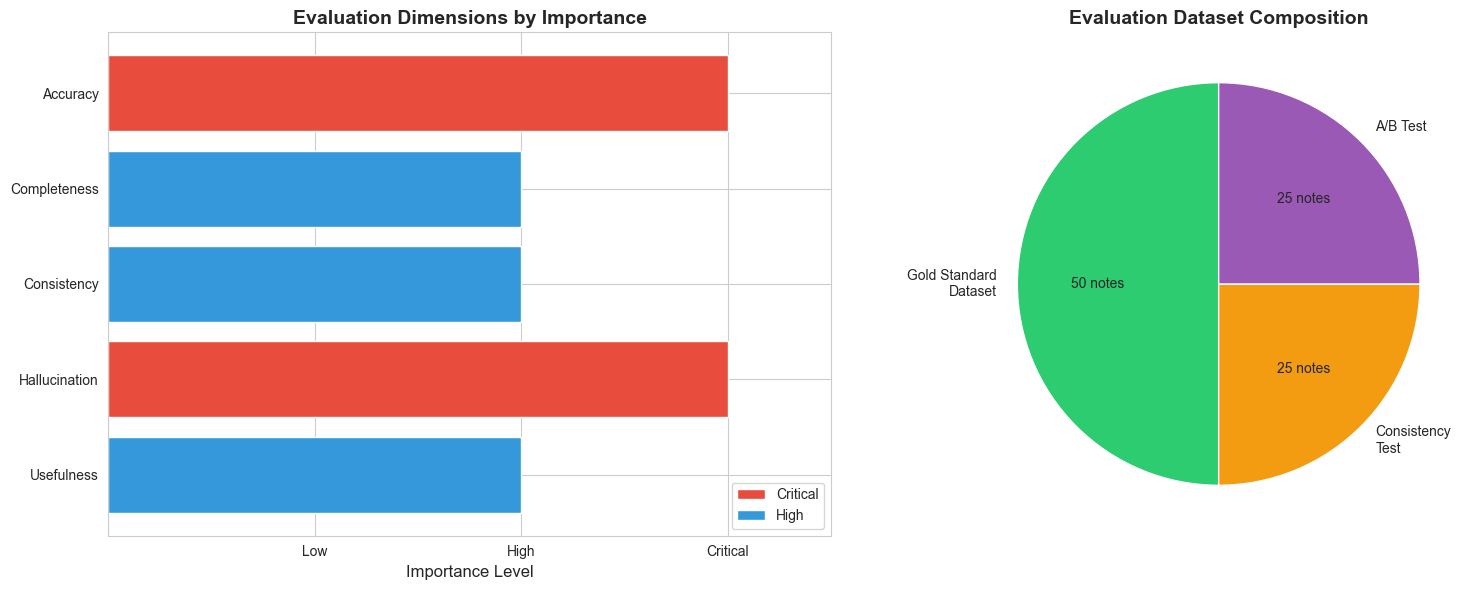


Note: Gold Standard dataset of 200 notes is used for Accuracy,
Completeness, and Hallucination evaluations (shared dataset).


In [16]:
# Visualize evaluation dimensions with importance weighting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of evaluation dimensions
dimensions = ['Accuracy', 'Completeness', 'Consistency', 'Hallucination', 'Usefulness']
importance_levels = [3, 2, 2, 3, 2]  # 3=Critical, 2=High
colors = ['#e74c3c' if x == 3 else '#3498db' for x in importance_levels]

axes[0].barh(dimensions, importance_levels, color=colors)
axes[0].set_xlabel('Importance Level', fontsize=12)
axes[0].set_title('Evaluation Dimensions by Importance', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 3.5])
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['', 'Low', 'High', 'Critical'])
axes[0].invert_yaxis()

# Add legend
legend_elements = [Patch(facecolor='#e74c3c', label='Critical'),
                   Patch(facecolor='#3498db', label='High')]
axes[0].legend(handles=legend_elements, loc='lower right')

# Sample sizes pie chart
sample_data = {
    'Gold Standard\nDataset': 200,
    'Consistency\nTest': 100,
    'A/B Test': 100
}

axes[1].pie(sample_data.values(), labels=sample_data.keys(), autopct='%d notes',
            colors=['#2ecc71', '#f39c12', '#9b59b6'], startangle=90)
axes[1].set_title('Evaluation Dataset Composition', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nNote: Gold Standard dataset of 200 notes is used for Accuracy,")
print("Completeness, and Hallucination evaluations (shared dataset).")

## 7. Executive Summary

In [17]:
print("="*80)
print("LLM CHATBOT EVALUATION FRAMEWORK - EXECUTIVE SUMMARY")
print("="*80)

print("\nOBJECTIVE:")
print("Evaluate whether the LLM chatbot for clinical note summarization produces")
print("valid, reliable, and useful output for prior authorization reviewers.")

print("\nEVALUATION DIMENSIONS (5):")
print("\n1. ACCURACY - Correctness vs expert ground truth")
print("   Success Criteria: ≥95% precision, ≥85% recall")
print("\n2. COMPLETENESS - Coverage of all relevant clinical facts")
print("   Success Criteria: ≥98% recall of critical elements")
print("\n3. CONSISTENCY - Test-retest reliability")
print("   Success Criteria: ≥95% semantic similarity across runs")
print("\n4. HALLUCINATION - Detection of fabricated information")
print("   Success Criteria: ≤2% hallucination rate, 0% critical hallucinations")
print("\n5. USEFULNESS - Real-world impact on reviewer workflow")
print("   Success Criteria: ≥30% time savings, ≥4.0/5.0 satisfaction")

print("\nDATASET REQUIREMENTS:")
print("• 200 notes: Gold standard for accuracy/completeness/hallucination")
print("• 100 notes: Consistency testing")
print("• 100 cases: A/B test for usefulness")
print("• Stratified by: procedure type, complexity, length, outcome")
print("• Timeline: 2-3 weeks for dataset preparation")

print("\nMETHODOLOGY STRENGTHS:")
print("✓ Comprehensive: Covers technical and business metrics")
print("✓ Domain-appropriate: Expert validation for medical domain")
print("✓ Safety-focused: Explicit hallucination detection")
print("✓ Real-world validation: A/B test with actual reviewers")
print("✓ Mixed methods: Automated + human evaluation")

print("\nKEY LIMITATIONS:")
print("⚠ Static evaluation (need ongoing monitoring)")
print("⚠ Sample size may miss rare edge cases")
print("⚠ Gold standard subjective (mitigated via consensus)")
print("⚠ No adversarial testing (add post-launch)")

print("\nRECOMMENDATION:")
print("This evaluation framework is RECOMMENDED because it:")
print("• Prioritizes safety (hallucination detection) in medical domain")
print("• Balances rigor with feasibility")
print("• Provides actionable go/no-go criteria")
print("• Enables continuous improvement post-deployment")

print("\nIMPLEMENTATION TIMELINE: 9 weeks")
print("Weeks 1-3: Dataset prep | Weeks 4-5: Technical eval |")
print("Weeks 6-8: A/B testing | Week 9: Decision")

print("\n" + "="*80)

LLM CHATBOT EVALUATION FRAMEWORK - EXECUTIVE SUMMARY

OBJECTIVE:
Evaluate whether the LLM chatbot for clinical note summarization produces
valid, reliable, and useful output for prior authorization reviewers.

EVALUATION DIMENSIONS (5):

1. ACCURACY - Correctness vs expert ground truth
   Success Criteria: ≥95% precision, ≥85% recall

2. COMPLETENESS - Coverage of all relevant clinical facts
   Success Criteria: ≥98% recall of critical elements

3. CONSISTENCY - Test-retest reliability
   Success Criteria: ≥95% semantic similarity across runs

4. HALLUCINATION - Detection of fabricated information
   Success Criteria: ≤2% hallucination rate, 0% critical hallucinations

5. USEFULNESS - Real-world impact on reviewer workflow
   Success Criteria: ≥30% time savings, ≥4.0/5.0 satisfaction

DATASET REQUIREMENTS:
• 200 notes: Gold standard for accuracy/completeness/hallucination
• 100 notes: Consistency testing
• 100 cases: A/B test for usefulness
• Stratified by: procedure type, complexity, 